# Natural Language Processing Project

## Movie Genre Classification

In this project we will do natural language processing. We have a dataset of movies synopsis and their genres. 

Now our goal is to create a machine learning model that is capable to recognize movies genres from their synopsis

# Download dataset

First we need to download our dataset. 

In this case we are going to use a movie dataset from kaggle

In [37]:
!pip3 install nltk

     |████████████████████████████████| 1.5 MB 1.8 MB/s 
     |████████████████████████████████| 703 kB 1.6 MB/s 
  Created wheel for regex: filename=regex-2021.9.24-cp39-cp39-macosx_11_1_arm64.whl size=273875 sha256=e8670b198fcdc43e322e331e92ed7fa3ef0e270e28ceaad6ffcccefe59aec0fd
  Stored in directory: /Users/muhammadhugo/Library/Caches/pip/wheels/a4/2e/bd/2d745991d2809f3da09f1c9aeb6746d1d5ec6c6da295033bdd
Successfully built regex


In [2]:
#downloading dataset from kaggle
!kaggle datasets download -d lokkagle/movie-genre-data

100%|██████████████████████████████████████| 9.46M/9.46M [00:04<00:00, 2.52MB/s]
100%|██████████████████████████████████████| 9.46M/9.46M [00:04<00:00, 2.31MB/s]


The downloaded dataset is still in a zip file format, therefore we need to zip it

In [3]:
#unzipping file
! unzip movie-genre-data.zip

Archive:  movie-genre-data.zip
  inflating: kaggle_movie_train.csv  


# Preprocessing data


In [4]:
#import library 

import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [47]:
df = pd.read_csv('kaggle_movie_train.csv')
df.tail()

,id,text,genre
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action
22578,28166,"rd walks off down the hallway, leaving his pos...",comedy


In [9]:
#checking the missing value
new_df.isnull().sum()

id           0
text         0
genre        0
action       0
adventure    0
comedy       0
drama        0
horror       0
other        0
romance      0
sci-fi       0
thriller     0
dtype: int64

a lot of machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers.

The best way to do that is to make one hot encoding on genre column

In [48]:
#one hot encoding 
genre = pd.get_dummies(df.genre)
genre.head()

,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0


In [49]:
#merge the movie dataframe with one hot encoding results
new_df = pd.concat([df, genre], axis=1)
new_df.head()

,id,text,genre,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,0,0,0,0,0,0,0,0,1
1,2,"t, summa cum laude and all. And I'm about to l...",comedy,0,0,1,0,0,0,0,0,0
2,3,"up Come, I have a surprise.... She takes him ...",drama,0,0,0,1,0,0,0,0,0
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller,0,0,0,0,0,0,0,0,1
4,5,"nd dismounts, just as the other children reach...",drama,0,0,0,1,0,0,0,0,0


we dropped the genre column because it was already represented by one hot encoding

In [50]:
#drop the genre column
new_df.drop(['genre'], axis=1)

,id,text,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",0,0,0,0,0,0,0,0,1
1,2,"t, summa cum laude and all. And I'm about to l...",0,0,1,0,0,0,0,0,0
2,3,"up Come, I have a surprise.... She takes him ...",0,0,0,1,0,0,0,0,0
3,4,ded by the two detectives. INT. JEFF'S APARTME...,0,0,0,0,0,0,0,0,1
4,5,"nd dismounts, just as the other children reach...",0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,0,0,0,1,0,0,0,0,0
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,0,0,0,1,0,0,0,0,0
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",0,0,0,0,0,0,0,0,1
22577,28165,....with marked skill and dexterity . LANA wry...,1,0,0,0,0,0,0,0,0


Now, we will apply this four steps which are as follow:
1. Cleaning Special Character
2. Converting to Lower case
3. Removing stopwords
4. Stemming

In [ ]:
#Apply text Preprocessing steps
import re
import nltk
from nltk.stem import PorterStemmer #nltk.download('stopwords'),nltk.download('porter_test')
from nltk.tokenize import sent_tokenize, word_tokenize #nltk.download('punkt')

porter = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

stopwords = nltk.corpus.stopwords.words('english')

for i in range(df.shape[0]):

    #converting to lower case
    new_df.text[i] = new_df.text[i].lower()
    
    #cleaning special character
    new_df.text[i] = re.sub(r"[^a-zA-Z0-9]"," ",new_df.text[i])


    #removing stopwords
    text_tokens = word_tokenize(new_df.text[i])
    tokens_without_sw = [word for word in text_tokens if not word in stopwords]
    new_df.text[i] = (" ").join(tokens_without_sw)

    #stemming 
    new_df.text[i] = stemSentence(new_df.text[i])



In [92]:
#converting a dataframe columns into feature and label in array format
feature = new_df['text'].values
label = new_df[['action','adventure','comedy','drama','horror','other','romance','sci-fi','thriller']]

In [93]:
#Split data into train and test data
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2)


# Convert strings into numeric values

Machine learning model can't process an input in strings format,
therefore we need to convert it to numeric format.

In this case we transform strings to numeric with tokenizer

In [94]:
#convert string to numeric values with tokenizer 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(feature_train) 
tokenizer.fit_on_texts(feature_test) 
 
#convert to sequences 
sequences_train = tokenizer.texts_to_sequences(feature_train)
sequences_test = tokenizer.texts_to_sequences(feature_test)

#padding
padded_train = pad_sequences(sequences_train) 
padded_test = pad_sequences(sequences_test) 


# Build a Model

In this step we will build a neural network machine learning model 

we will perform multiclass text classification using lstm. 


we use callback to prevent model from overfitting

In [96]:
#use callback function

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.8 and logs.get('accuracy') > 0.8):
      print("\ Stop training!")
      self.model.stop_training = True

callbacks = myCallback()

Our model architecture uses an Embedding layer with an embedding dimension of 16, 

and the dimensions of the input are equal to the num_words value in the tokenizer object. 

In [97]:
#membangun arsitektur model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 585       
Total params: 117,897
Trainable params: 117,897
Non-trainable params: 0
_________________________________________________________________


Train model

In [99]:
history = model.fit(
    padded_train,
    label_train, 
    epochs=40, 
    validation_data=(padded_test,label_test), 
    verbose=2,
    callbacks=[callbacks]
    )

2021-09-28 13:44:32.190767: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-28 13:44:32.195797: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/40
565/565 - 18s - loss: 1.3813 - accuracy: 0.4217 - val_loss: 1.1584 - val_accuracy: 0.4267
Epoch 2/40
565/565 - 17s - loss: 0.8954 - accuracy: 0.6503 - val_loss: 0.8112 - val_accuracy: 0.7210
Epoch 3/40
565/565 - 18s - loss: 0.5708 - accuracy: 0.8116 - val_loss: 0.6314 - val_accuracy: 0.7965
Epoch 4/40
565/565 - 17s - loss: 0.4420 - accuracy: 0.8556 - val_loss: 0.6053 - val_accuracy: 0.8133
\ Stop training!


here we got 85% of accuracy on training data and 81% percent accuracy on validation data

# Plot accuracy and Plot Loss

now we are going to see the coomparison of accuracy and loss of the model in training and validation data

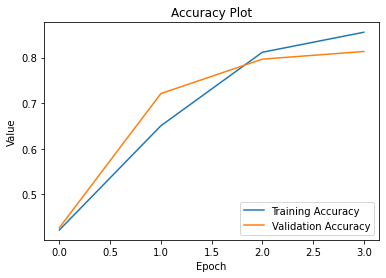

In [100]:
#graphic of model accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

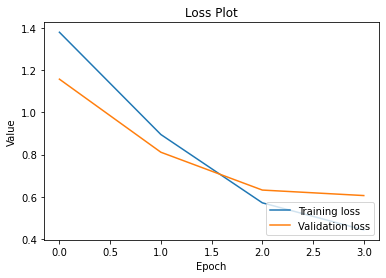

In [101]:
#graphic of model loss

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()